In [1]:
import datetime 

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
import folium 
import geopandas as gpd 
current_file_path = os.path.abspath(os.getcwd())
parent_dir = os.path.abspath(os.path.join(current_file_path, '..','..','..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from load_inputs.systematic_analysis.load_bike import load_dataset
from load_inputs.systematic_analysis.utils import get_histogram_per_day_type,get_boxplot_per_spatial_unit_per_day_type,heatmap
from load_inputs.systematic_analysis.utils import IN_bdc,OUT_bdc,IN_nbdc,OUT_nbdc


city = 'Lyon'
agg_iris_target_n = 100  # None  #100
threshold_volume_min = 1 # None # 1

for signal in ['in','out']:
    ds, df_raw, df =  load_dataset(f"bike_{signal}",agg_iris_target_n,threshold_volume_min)
    df_raw.columns.name = 'Spatial Unit ID'
    palette = [IN_bdc, IN_nbdc] if signal == 'in' else [OUT_bdc, OUT_nbdc]

    globals()[f'ds_{signal}'] = ds
    globals()[f'df_raw_{signal}'] = df_raw
    globals()[f'df_{signal}'] = df
    globals()[f'palette_{signal}'] =  palette

df_raw.head()

/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No module xgboost
Training and Hyper-parameter tuning with Ray is not possible
Loading from /home/rrochas/../../data/rrochas/prediction_validation/agg_data/velov/velov_attracted_by_station15min.csv...
df pivoted:  (70094, 435)
df reindexed :  (35040, 435)
Len coverage period:  35040
df filtered:  (35040, 435)
   Loaded data: (35040, 435)
   Dimension after spatial agg: (35040, 26)
Loading from /home/rrochas/../../data/rrochas/prediction_validation/agg_data/velov/velov_emitted_by_station15min.csv...
df pivoted:  (70049, 434)
df reindexed :  (35040, 434)
Len coverage period:  35040
df filtered:  (35040, 434)
   Loaded data: (35040, 434)
   Dimension after spatial agg: (35040, 26)


Spatial Unit ID,24,35,36,41,46,48,49,51,52,53,...,82,83,88,90,92,93,94,97,98,99
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.0,2.0,0.0,1.0,0.0,7.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0
2019-01-01 00:15:00,0.0,1.0,1.0,2.0,0.0,9.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,1.0,14.0,2.0,2.0,3.0,1.0
2019-01-01 00:30:00,0.0,8.0,0.0,0.0,0.0,9.0,4.0,0.0,4.0,1.0,...,0.0,0.0,2.0,2.0,1.0,6.0,14.0,5.0,2.0,0.0
2019-01-01 00:45:00,11.0,9.0,0.0,0.0,0.0,16.0,17.0,7.0,8.0,5.0,...,1.0,0.0,6.0,12.0,0.0,5.0,19.0,5.0,7.0,1.0
2019-01-01 01:00:00,1.0,7.0,0.0,2.0,0.0,24.0,4.0,3.0,8.0,2.0,...,1.0,1.0,4.0,5.0,0.0,12.0,27.0,6.0,9.0,1.0


# Histogramme des volumes agrégée 15 min en business day / non business day

Number of remaining time-slots after filtering 3263
Number of remaining time-slots after filtering 1482


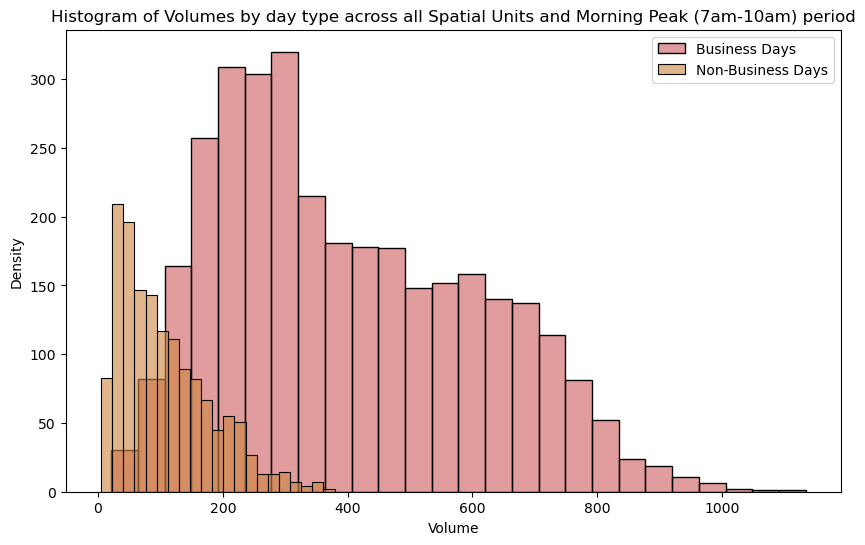

In [2]:
# from utils import get_histogram_per_day_type
stats = 'count'
# ts_bd, ts_nbd = get_histogram_per_day_type(df_raw,city= city,period = 'all_day',stats = stats, palette = [IN_bdc, IN_nbdc])
ts_bd, ts_nbd = get_histogram_per_day_type(df_raw,city= city,period = 'morning_peak',stats = stats, palette =palette)
# ts_bd, ts_nbd = get_histogram_per_day_type(df_raw,city= city,period = 'evening_peak',stats = stats, palette = [IN_bdc, IN_nbdc])

# Boxplot des volumes par station en business days / non business days:

Number of remaining time-slots after filtering 3263
Number of remaining time-slots after filtering 1482


<Figure size 1200x600 with 0 Axes>

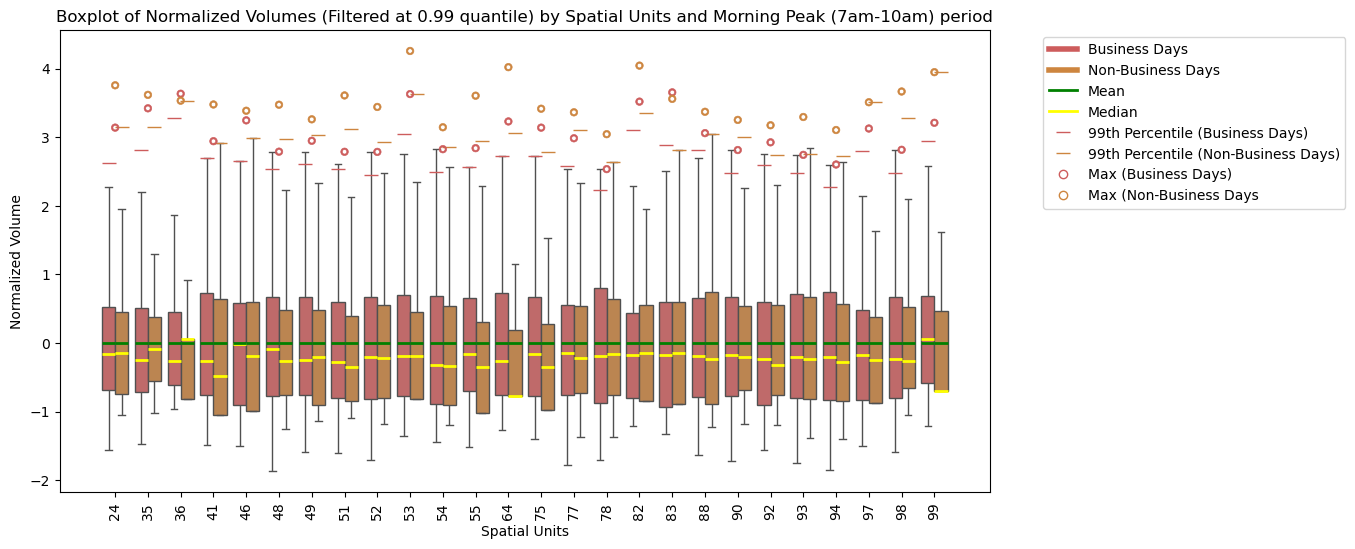

In [5]:
# # from utils import get_boxplot_per_spatial_unit_per_day_type
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'all_day',city= city, palette = palette)
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'morning_peak',city= city, palette = palette)
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'evening_peak',city= city, palette = palette)


# # normalize df_raw:
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'all_day',city= city, palette = palette, norm=True,normtype='zscore')  
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'morning_peak',city= city, palette = palette, norm=True,normtype='zscore')
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'evening_peak',city= city, palette = palette, norm=True,normtype='zscore')


# # normalize anf filtered df_raw :
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'all_day',city= city, palette = palette, norm=True,filter_q = 0.99,normtype='zscore')
df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'morning_peak',city= city, palette = palette, norm=True,filter_q = 0.99,normtype='zscore')
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'evening_peak',city= city, palette = palette, norm=True,filter_q = 0.99,normtype='zscore')
# # --------------------------------------------------
# # Identification des particularités:


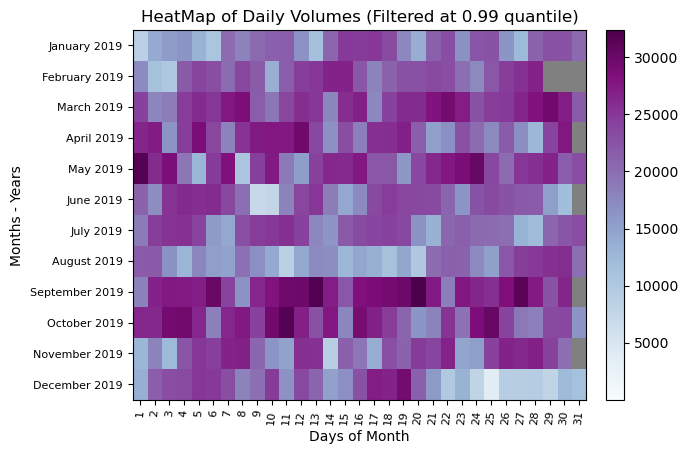

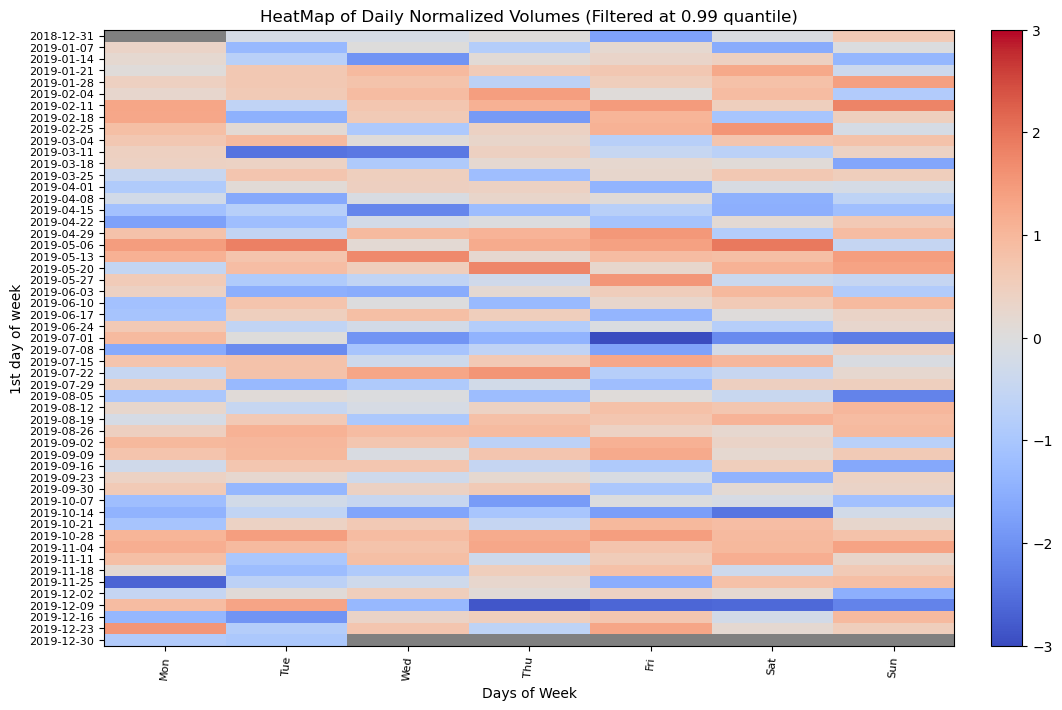

In [6]:
cmap = 'BuPu' # 'hot' #'YlOrRd' # 'RdYlBu'
bool_reversed= False 
df_agg = heatmap(df_raw,city= city,filter_q = 0.99,cmap = cmap,bool_reversed = bool_reversed)
# df_agg = heatmap(df_raw,city= city,cmap = cmap,bool_reversed = bool_reversed)

df_agg = heatmap(df_raw,city= city,filter_q = 0.99,norm = True,
                 cmap = 'coolwarm',bool_reversed = bool_reversed,
                 normalized_based_on= ('business_day','school_holidays'), # ,'weekday'
                 index = 'monday_date',
                 columns = 'day_of_week',
                 vmin = -3, vmax = 3,
                 figsize = (12,8))

# Folium Map

In [7]:
# Open Json velov dataset 
import json
import pandas as pd
import folium
from branca.element import MacroElement,Template
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import LineString

from load_inputs.Lyon.pt.subway_in import get_trigram_correspondance

data_folder  = '../../../../../../data/rrochas/raw_data'

bike_json_path = 'VELO-LYON/locations/pvo_patrimoine_voirie.pvostationvelov.json'
iris_shapefile_path = 'lyon_iris_shapefile/lyon.shp'  # IRIS/CONTOURS-IRIS.shp  # IRIS/lyon_sig_station.shp
# Load Bike data
with open(os.path.join(data_folder, bike_json_path)) as f:
    bike_data = json.load(f)
df_bike = pd.json_normalize(bike_data['features'])
df_bike['geometry.coordinates'] = df_bike['geometry.coordinates'].apply(lambda x: (x[1],x[0]))
df_bike['station_id'] = df_bike['properties.idstation']
df_bike['geometry'] = df_bike['geometry.coordinates'].apply(lambda x: Point(x[1],x[0]))
df_bike = df_bike.set_geometry('geometry')
df_bike = df_bike.set_crs(epsg=4326)
df_bike = df_bike[['station_id','geometry']]


# --- Add inflow and outflow to subway stations gdf
# quantile filter
df_raw_in_f = df_raw_in[df_raw_in < df_raw_in.quantile(0.99)]
df_raw_out_f = df_raw_out[df_raw_out < df_raw_out.quantile(0.99)]
# Inflow 
inflow = df_raw_in_f.sum(axis = 0)
inflow.name = 'Inflow'
inflow.index.name = 'COD_STA'

# Outflow 
outflow = df_raw_out_f.sum(axis = 0)
outflow.name = 'Outflow'
outflow.index.name = 'COD_STA'
# -----

# Merging inflow and outflow with gdf
df_bike = df_bike.merge(inflow.reset_index(),on = ['COD_STA'])
df_bike = df_bike.merge(outflow.reset_index(),on = ['COD_STA'])


m = folium.Map(location=[45.75, 4.85], zoom_start=12, tiles='CartoDB positron')  # paleturquoise  #azure
m = df_bike.explore(m =m,  
                                legend = False, name= 'Inflow - Subway',
                                style_kwds = {"style_function": lambda x: {"radius": 20*(x["properties"]["Inflow"]/df_bike.Inflow.max()), 'color' : IN_bdc},
                                },
                                )
m = df_bike.explore(m =m,  
                                legend = False, name= 'Outflow - Subway',
                                style_kwds = {"style_function": lambda x: {"radius": 20*(x["properties"]["Outflow"]/df_bike.Outflow.max()), 'color' : OUT_bdc},
                                },
                                )
m = df_bike.explore(m=m, color = 'grey', legend = False, name= 'Subway Lanes', style_kwds={'weight': 4, 'opacity': 0.7})
folium.LayerControl().add_to(m)


# Create a custom legend
legend_html = f"""
{{% macro html(this, kwargs) %}}
<div style="position: fixed; 
     bottom: 30px; right: 10px; width: 160px; 
     background-color: white; border: 2px solid grey; border-radius: 8px;
     padding: 10px; font-family: Arial, sans-serif; font-size: 14px;
     z-index: 9999; opacity: 0.9;">

    <h5 style="margin-top: 1px; margin-bottom: 2px; border-bottom: 1px solid lightgrey;">Legend</h5>

    &nbsp; <i class="fa fa-minus" style="color:grey; font-size:18px;"></i> &nbsp; Subway Lanes<br>
    &nbsp; <i class="fa fa-circle" style="color:#e4413e"; font-size:18px;"></i> &nbsp; Inflow<br>
    &nbsp; <i class="fa fa-circle" style="color:#0072bc"; font-size:18px;"></i> &nbsp; Outflow<br>



</div>
{{% endmacro %}}
"""

# get color hdec of IN_bdc: 
hdec_IN_bdc = '#e4413e'  # red shade
hdec_OUT_bdc = '#0072bc'  # blue shade
# If needed add: 
#   &nbsp; <i class="fa fa-circle" style="color: lightgreen; -webkit-text-stroke: 1px green; text-stroke: 1px green;"></i> &nbsp; Bike-Sharing Stations<br>
#  &nbsp; <i class="fa fa-square" style="color:black; -webkit-text-stroke: 1px black;"></i> &nbsp; Unpartitioned municipality<br>
legend = MacroElement()
legend._template = Template(legend_html)

# Add the legend to the map
m.get_root().add_child(legend)
m 

KeyError: 'COD_STA'